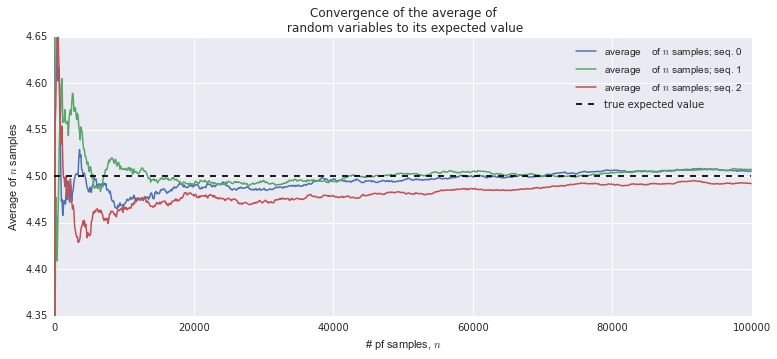

In [63]:
#Law of Large Numbers

%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

figsize(12.5, 5)
import pymc as pm

sample_size = 100000
expected_value = lambda_ = 4.5
poi = pm.rpoisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    
    samples = poi(lambda_, size = sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    
    plt.plot(N_samples, partial_average, lw=1.5, label="average\
    of $n$ samples; seq. %d" %k)
    
plt.plot(N_samples, expected_value*np.ones_like(partial_average),
        ls='--', label="true expected value", c="k")

plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its expected value")
plt.ylabel("Average of $n$ samples")
plt.xlabel("# pf samples, $n$")
plt.legend()
    
    

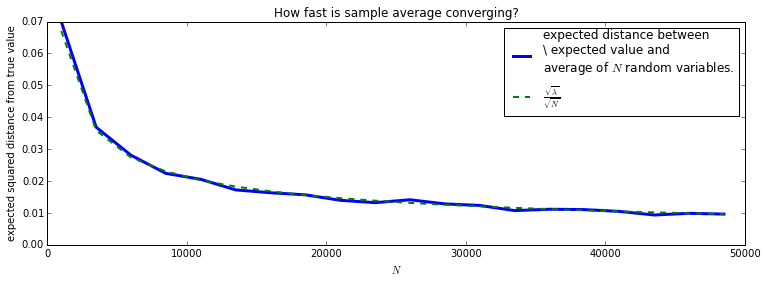

In [7]:
#What if we want to know how fast we are converging on the true expected value
#we can take a distance measurement and average the distance over a large number of samples
#we can then plot how the distance changes as our N increases

figsize(12.5, 4)

N_Y = 250
N_array = np.arange(1000,50000,2500)
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    
    """
    This function approximates D_n, the average variance of using n samples
    """

    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    
    D_N_results[i] = D_N(n)
    

plt.xlabel("$N$")
plt.ylabel("expected squared distance from true value")
plt.plot(N_array, D_N_results, lw=3,
        label="expected distance between\n\ expected value and \naverage of $N$ random variables.")

plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls='--',
                         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")

plt.legend()
plt.title("How fast is sample average converging?")

In [9]:
#We can measure the rate of convergence 
N = 10000
print np.mean([pm.rexponential(0.5) > 10 for i in range(N)])

0.0058


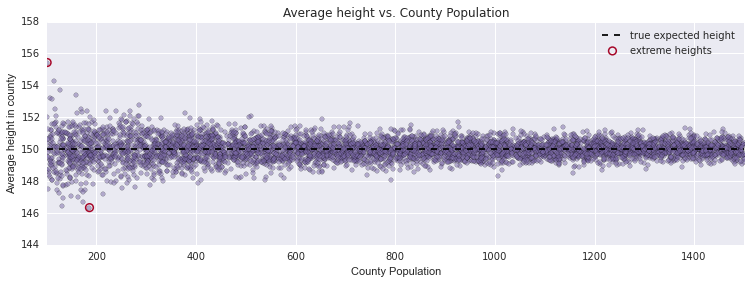

In [69]:
#Limatations of Law of Large Numbers
#Lets look at heights across a numbre of counties

figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
#We create two generators with the proper shapes we need
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

#Now we need artificial population numbers
population = pop_generator(100,1500,size=n_counties)

#Lets create a data structure to hold our averages
average_across_county = np.zeros(n_counties)

for i in range(n_counties):
    #this populates the list with the appropriate vals
    average_across_county[i] = norm(mean_height, 1. / std_height ** 2,
                                   size=population[i]).mean()
#Lets find a min and max    
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

#plot population size vs. recorded average
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
           [average_across_county[i_min], average_across_county[i_max]],
           s=60, marker='o', facecolors='none', 
           edgecolors="#A60628", linewidth=1.5,
           label="extreme heights")

plt.xlim(100,1500)
plt.title("Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot([100,1500], [150,150], color='k', label='true expected height',ls='--')
plt.legend(scatterpoints=1);
    
    


In [72]:
#Since we've taken the mean across the counties are extreme values 
#are not true extremes but the extreme mean and min values
#we cannot properly infer that these values represent true min/max heights

#Also since the populations of the counties is different and random
#we cannot draw the same inferences

#Since population numbers were uniformly distributed between 100 and 1500
#our intuition tells us the counties with the most extreme population heights
#should also be uniformly spread out and independent of population

#lets check this
print "County populations with shortest heights"
print population[np.argsort(average_across_county)[:10]]
print 
print "County populations with tallest heights"
print population[np.argsort(-average_across_county)[:10]]

County populations with shortest heights
[186 131 174 133 162 149 213 124 173 170]

County populations with tallest heights
[101 115 127 159 106 110 285 169 116 239]


In [73]:
#We can see that the extremes come from counties with smaller population sizes

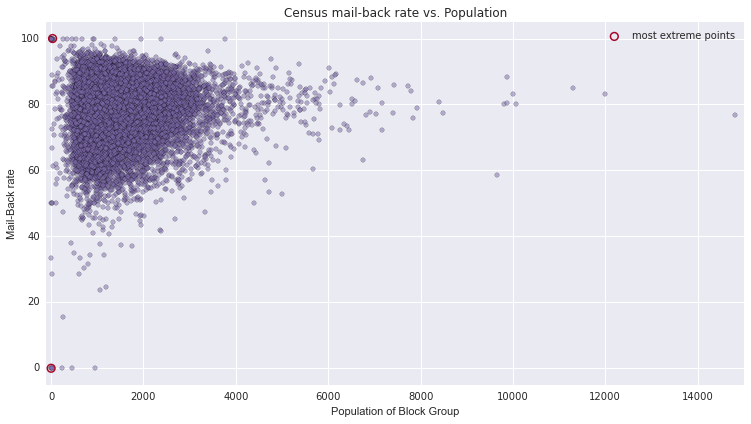

In [80]:
figsize(12.5, 6.5)

data = np.genfromtxt("data/census_data.csv", skip_header=1, delimiter=',')

plt.scatter(data[:,1], data[:,0], alpha=0.5, c="#7A68A6")
plt.title("Census mail-back rate vs. Population")
plt.ylabel("Mail-Back rate")
plt.xlabel("Population of Block Group")
plt.xlim(-100,15e3)
plt.ylim(-5, 105)


i_min = np.argmin(data[:,0])
i_max = np.argmax(data[:,0])

plt.scatter([data[i_min, 1], data[i_max,1]],
            [data[i_min, 0], data[i_max, 0]],
            s=60, marker='o', facecolors="none",
           edgecolors="#A60628", lw=1.5,
           label="most extreme points")

plt.legend(scatterpoints=1);

Title of submission: 
Went to lunch with my co-workers... got judged by the waitress.
http://i.imgur.com/Y9brnzl.jpg


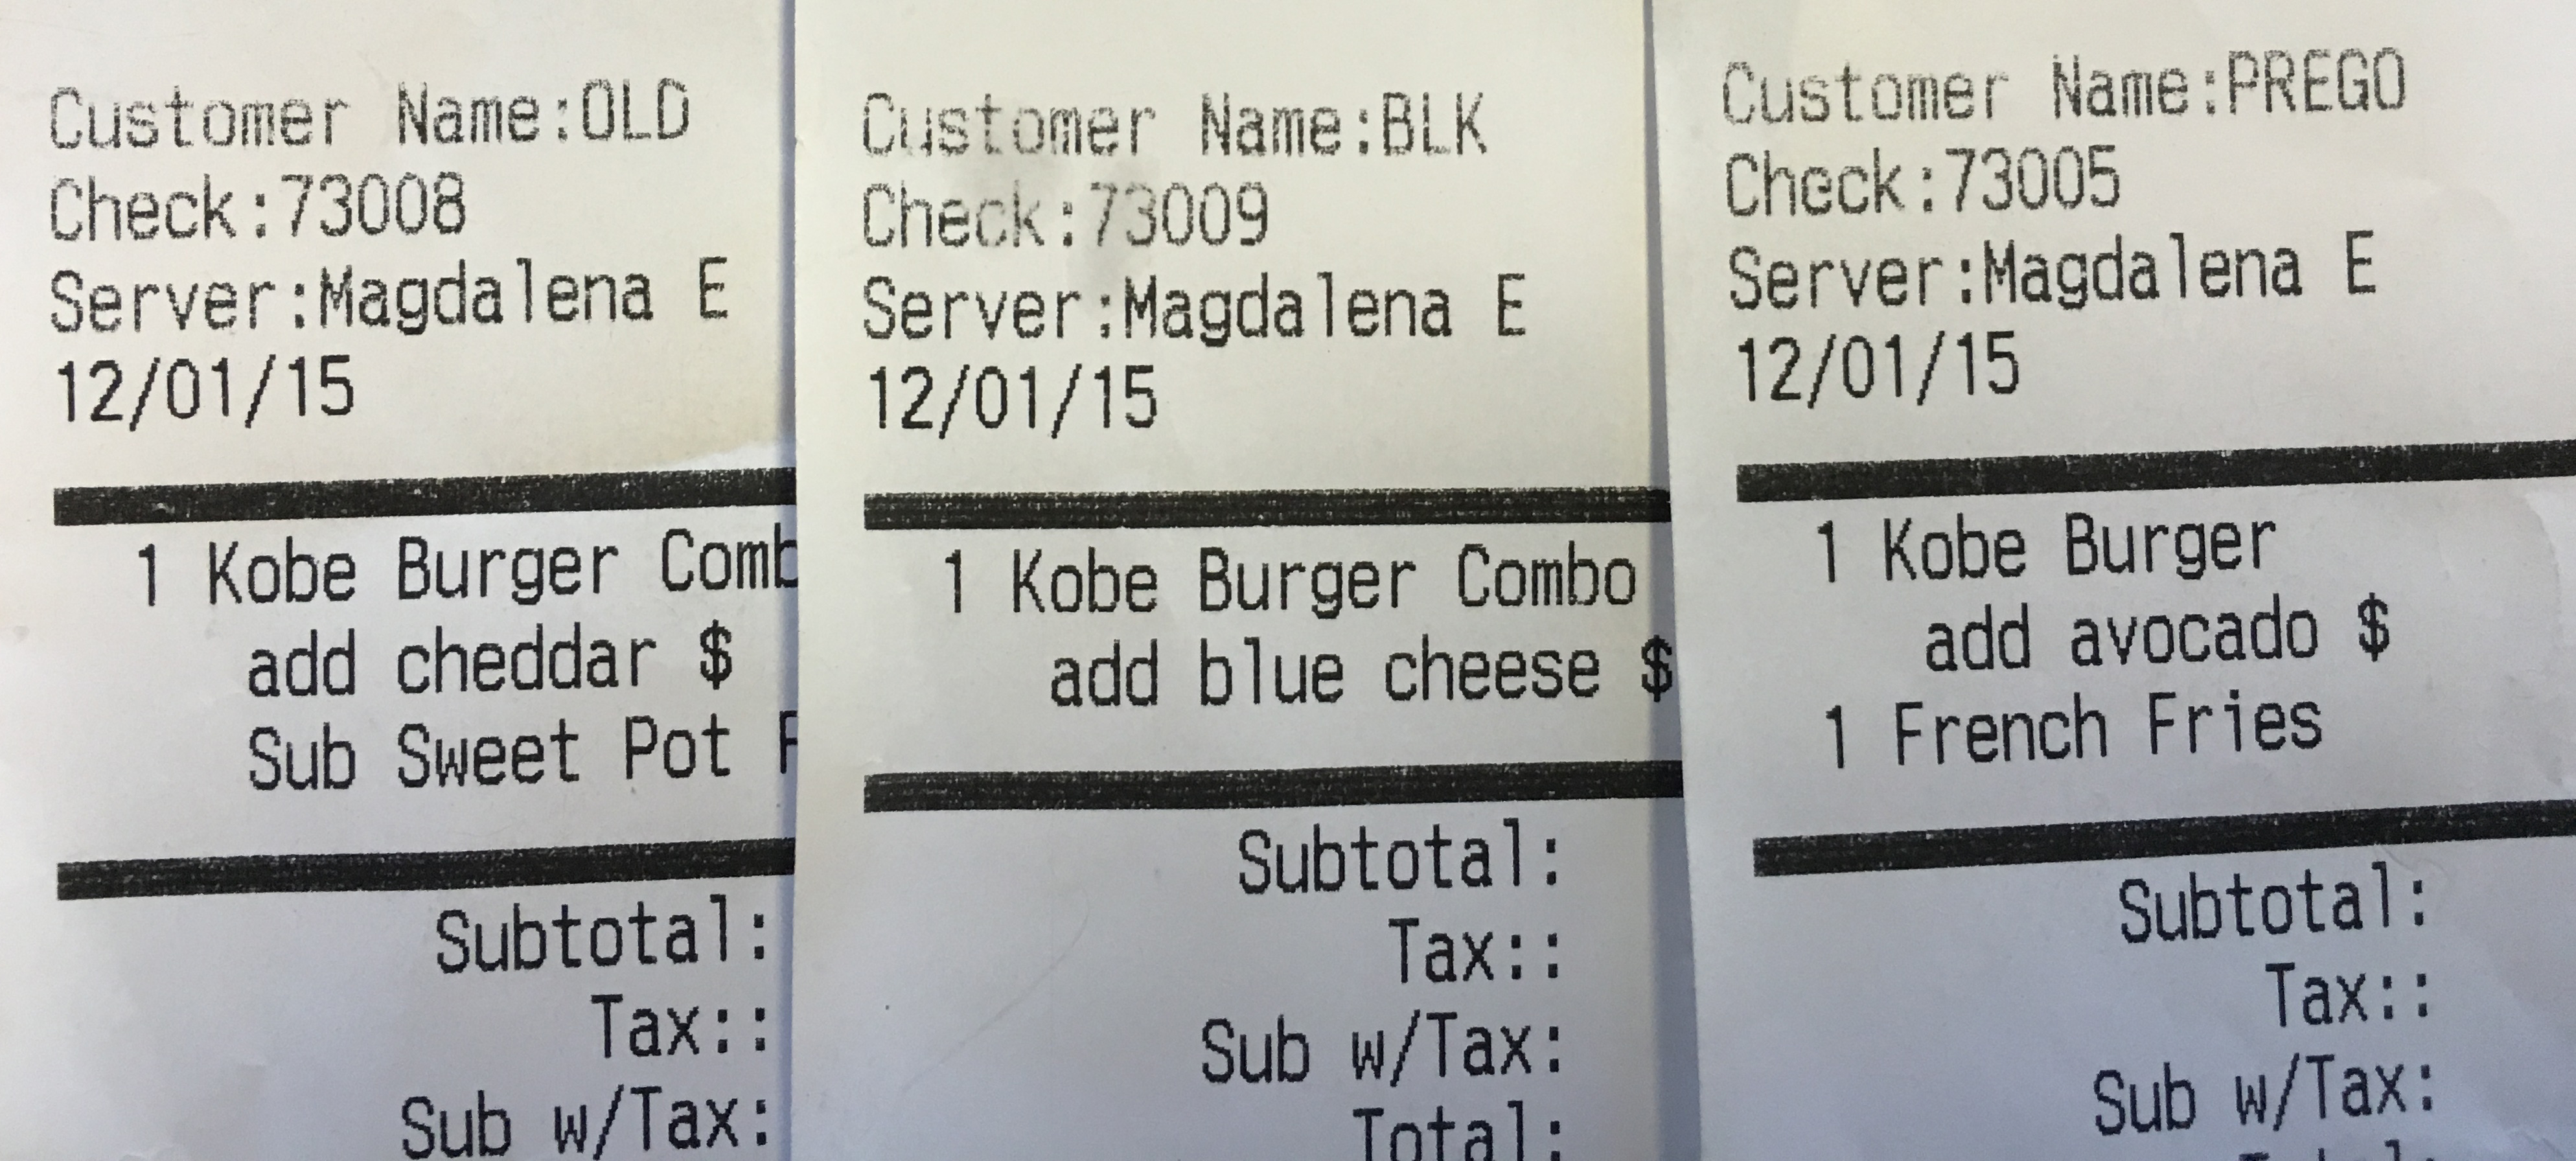

In [94]:
#Ordering Reddit Comments

#How to determine the best comments on Reddit?

#1. Total number of upvotes and downvotes
#2. The diff between upvotes and downvotes
#3. Measuring volume of upvotes for some time t
#4. Upvotes to total votes ratio

#What we reall want to know is how good an article/comment is
#How can we measure such a thing?

#We would like a estimate of a true upvote ratio
#True upvote ratio and observed upvote ratio are different
#True upvote ratio is hidden from us
#We can have confidence in our estimates or true upvote ratio as N increases
#With small N we have little confidence in our estimates of True Upvote Ratios

#Priors

#One way to determine the priors on upvote ratio is to look at 
#Historical distribution of upvote ratios

#There will be problems with these estimates as well
#since upvote behavior is different for different types
#of comment forums. In some subreddits, upvotes will be more common than down

from IPython.core.display import Image

%run reddit_comments_scraper.py 3

Image(top_post_url)



In [104]:
#We used a Python Lib called PRAW (Python Reddit API Wrapper)

"""
contents: an array of the text from all comments on the pic
votes: a 2D numpy array upvotes, downvotes for each comment
"""

n_comments = len(contents)
comments = np.random.randint(n_comments, size=4)

print "Some comments (out of %d total)" % n_comments

for i in comments:
    print '"' + contents[i] + '"'
    print "upvotes/downvotes", votes[i,:]
    print

Some comments (out of 55 total)
"I don't know if any of those are judgments. They're just general observations that society would probably agree with. "Yeah, that guy is black!""
upvotes/downvotes [388   0]

"You got labled.  Not judged..."
upvotes/downvotes [6 0]

"So, was her judgement accurate? Was it a old person, a black person and a Prego, which also mean "You're welcome" "
upvotes/downvotes [12  0]

"This raises SO many questions...

Why did PREGO not get the combo, then order fries?
Does the combo not come with fries? 
If not, what did OLD sub sweet potato fries for?
If so, what does the combo have that PREGO did not want it?

INQUIRING MINDS!!!!"
upvotes/downvotes [813   0]



In [120]:
#For a given true upvote ratio p and N votes
#the number of upvotes will look like a binomial random variable 
#with parameters p and N.

def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    This function accepts the number of upvotes and downvotes a particular comment received, 
    and the number of posterior samples to return to the user. Assumes a uniform prior.
    """
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    # do the fitting; first do a MAP as it is cheap and useful.
    map_ = pm.MAP([upvote_ratio, observations]).fit()
    mcmc = pm.MCMC([upvote_ratio, observations])
    mcmc.sample(samples, samples / 4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 1.0 sec

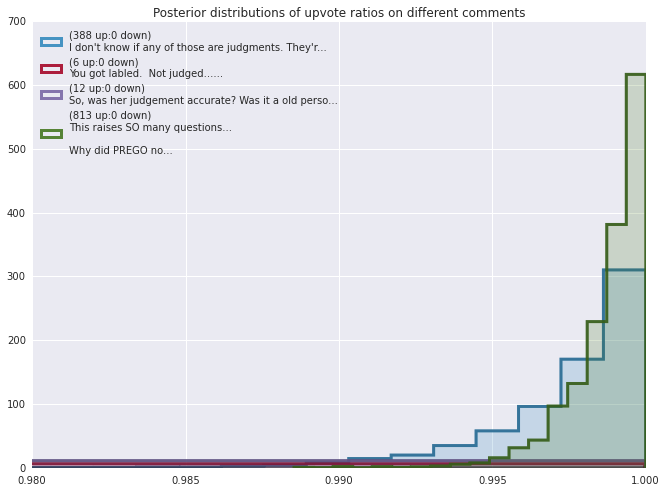

In [130]:
figsize(11., 8)
posteriors = []
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(comments)):
    j = comments[i]
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j, 1]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.9,
             histtype="step", color=colours[i % 5], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )

plt.legend(loc="upper left")
plt.xlim(0.98, 1)
plt.title("Posterior distributions of upvote ratios on different comments");

[3 0 2 1] [0.99188879248708361, 0.66290076007872201, 0.79671672267732252, 0.99627586828051462]


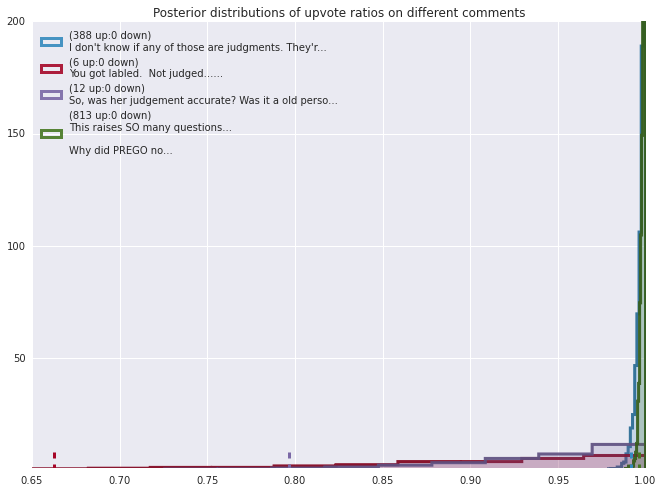

In [149]:
#We wanted to sort comments from best to worst
#However, all we have now are distributions of the posteriors
#You can convert distributions to scalars and use that as criteria for sorting
#95% least plausible value: only 5% chance the true parameter is lower

N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(comments)):
    j = comments[i]
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    v = np.sort(posteriors[i])[int(0.05 * N)]
    # plt.vlines( v, 0, 15 , color = "k", alpha = 1, linewidths=3 )
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--", linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.xlim(.65,1)
plt.ylim(1, 200)
plt.legend(loc="upper left")
plt.title("Posterior distributions of upvote ratios on different comments");
order = np.argsort(-np.array(lower_limits))
print order, lower_limits

In [150]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a / (a+b)
    std_err = 1.65 * np.sqrt((a+b) / ((a+b) ** 2 * (a + b + 1.)))
    return (mu, std_err)

print "Approximate Lower Bounds"
posterior_mean, std_err = intervals(votes[:, 0], votes[:,1])
lb = posterior_mean - std_err
print lb
print 
print "Top 40 sorted according to Approximate lower bounds:"
print 

order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print votes[i, 0], votes[i, 1], contents[i]
    print '------------'


Approximate Lower Bounds
[ 0.99793503  0.99659956  0.99262477  0.99674971  0.90638207  0.99321054
  0.93425615  0.99858464  0.95293817  0.983872    0.88119401  0.9779736
  0.93258348  0.74267867  0.81471061  0.970328    0.80077079  0.94019173
  0.84685225  0.63665233  0.83745405  0.9270125   0.49875259  0.49875259
  0.63665233  0.76547684  0.89528168  0.80077079  0.49875259  0.49875259
  0.49875259  0.49875259  0.49875259  0.49875259  0.49875259  0.57873281
  0.68054564  0.68054564  0.63665233  0.57873281  0.68054564  0.83745405
  0.49875259  0.57873281  0.57873281  0.71496362  0.38104878  0.38104878
  0.38104878  0.38104878  0.38104878  0.38104878  0.38104878  0.38104878
  0.38104878]

Top 40 sorted according to Approximate lower bounds:

1870 0 I've seen worse excuses to share my favorite greentext: https://i.imgur.com/5HUry.png
------------
1281 0 So are you old, black or prego?  You can't leave us hanging here.
------------
813 0 This raises SO many questions...

Why did PREGO not 

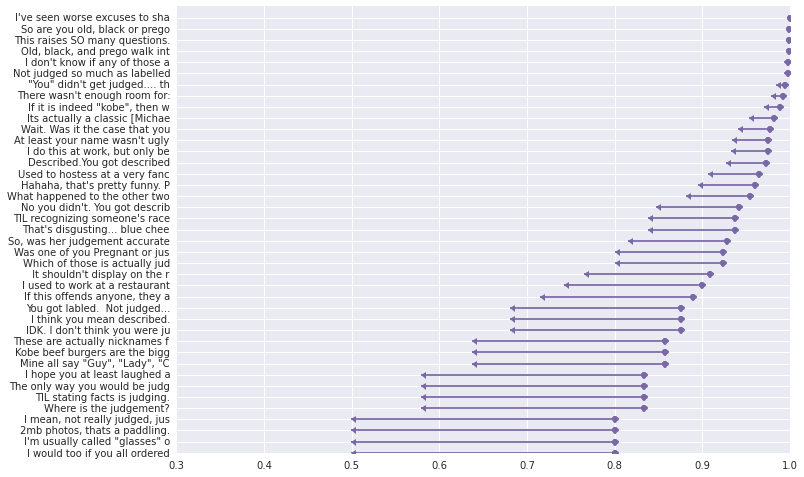

In [153]:
r_order = order[::-1][-40:]
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
             xerr=std_err[r_order], xuplims=True, capsize=0, fmt="o",
             color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1), map(lambda x: x[:30].replace("\n", ""), ordered_contents));
